<span style="font-family:Times New Roman; font-size:16px;">

<b>Cell 1: Dataset Extraction</b>

In this cell, the downloaded Animals dataset ZIP file is extracted into a local working directory using Python.  
The `zipfile` module is used to unzip the dataset because Jupyter Notebook running on Windows does not support Linux-based `unzip` commands.  

A destination folder is created if it does not already exist, and all dataset files are extracted into it.  
This step prepares the raw image dataset for further preprocessing and analysis.

</span>


In [1]:
import zipfile
from pathlib import Path

zip_path = Path(r"C:\Users\danis\EDGE INTELLIGENCE LAB\Animals.zip")
extract_to = Path(r"C:\Users\danis\EDGE INTELLIGENCE LAB\Animals_extracted")

extract_to.mkdir(parents=True, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extracted to:", extract_to)


Extracted to: C:\Users\danis\EDGE INTELLIGENCE LAB\Animals_extracted


<span style="font-family: 'Times New Roman'; font-size:16px;">

<b>Cell 2: Image Dimension Analysis</b>

In this cell, a subset of images from the extracted dataset is scanned to analyze their dimensions.  
Each image is loaded using the PIL library and converted into a NumPy array to obtain its shape information.<br><br>

By collecting the <i>(height, width, channels)</i> values of multiple images, it is observed that the dataset contains images of varying sizes.  
This analysis confirms the necessity of resizing all images to a common resolution before performing feature extraction.

</span>


In [2]:
import os
from PIL import Image
import numpy as np

DATA_DIR = r"C:\Users\danis\EDGE INTELLIGENCE LAB\Animals_extracted"
shapes = []

for root, dirs, files in os.walk(DATA_DIR):
    for f in files:
        if f.lower().endswith(('.jpg', '.png', '.jpeg')):
            path = os.path.join(root, f)
            try:
                img = Image.open(path).convert("RGB")
                shapes.append(np.array(img).shape)
            except:
                pass

    if len(shapes) > 300:
        break

print("Images scanned:", len(shapes))
print("Unique shapes found:", len(set(shapes)))
print("Example shapes:", list(set(shapes))[:10])


Images scanned: 4863
Unique shapes found: 320
Example shapes: [(300, 243, 3), (300, 254, 3), (215, 300, 3), (187, 300, 3), (284, 300, 3), (136, 300, 3), (300, 205, 3), (300, 216, 3), (134, 300, 3), (300, 284, 3)]


<span style="font-family: 'Times New Roman'; font-size:16px;">

<b>Image Resizing and Standardization</b>

In this cell, all images from the dataset are resized to a fixed resolution of **224 × 224 pixels**.  
A pad-to-square technique is applied before resizing to preserve the original aspect ratio and prevent image distortion.

The resized images are saved into a new directory while maintaining the original folder (class) structure.  
This standardization step ensures that all images have the same dimensions, making them suitable for feature extraction and machine learning models.

</span>


In [3]:
import os
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

DATA_DIR = r"C:\Users\danis\EDGE INTELLIGENCE LAB\Animals_extracted"
RESIZED_DIR = r"C:\Users\danis\EDGE INTELLIGENCE LAB\Animals_resized"
TARGET_SIZE = (224, 224)

os.makedirs(RESIZED_DIR, exist_ok=True)

def pad_to_square(img):
    w, h = img.size
    if w == h:
        return img
    s = max(w, h)
    new = Image.new("RGB", (s, s), (0,0,0))
    new.paste(img, ((s-w)//2, (s-h)//2))
    return new

for root, dirs, files in os.walk(DATA_DIR):
    for f in files:
        if f.lower().endswith((".jpg", ".jpeg", ".png")):
            src = os.path.join(root, f)

            rel = os.path.relpath(root, DATA_DIR)
            out_folder = os.path.join(RESIZED_DIR, rel)
            os.makedirs(out_folder, exist_ok=True)

            dst = os.path.join(out_folder, f)

            try:
                img = Image.open(src).convert("RGB")
                img = pad_to_square(img)
                img = img.resize(TARGET_SIZE)
                img.save(dst)
            except:
                pass

print("Resizing completed!")


Resizing completed!


<span style="font-family: 'Times New Roman'; font-size:16px;">
<b>Feature Extraction from Images</b>b>

In this cell, basic image features are extracted from the resized images.  
The extracted features include mean RGB color values, standard deviation of RGB intensities, and edge strength computed using Canny edge detection.  

These features capture important visual characteristics such as color distribution and structural complexity of the images.  
Only a limited number of images are processed and printed to avoid excessive output in the notebook.
</span>

In [4]:
import os
import numpy as np
from PIL import Image, ImageFile
import cv2

ImageFile.LOAD_TRUNCATED_IMAGES = True

RESIZED_DIR = r"C:\Users\danis\EDGE INTELLIGENCE LAB\Animals_resized"

image_count = 0
MAX_IMAGES_TO_PROCESS = 10  # limit output

for root, dirs, files in os.walk(RESIZED_DIR):
    for f in files:
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(root, f)

            try:
                img = Image.open(path).convert("RGB")
                arr = np.array(img)
            except Exception as e:
                print(f"Error opening image {path}: {e}")
                continue

            mean_color = arr.mean(axis=(0,1))
            std_color  = arr.std(axis=(0,1))
            gray = cv2.cvtColor(arr, cv2.COLOR_RGB2GRAY)
            edges = cv2.Canny(gray, 100, 200)
            edge_strength = edges.mean()

            print("\nImage:", path)
            print(" Mean Color:", mean_color)
            print(" Std Color:", std_color)
            print(" Edge Strength:", edge_strength)

            image_count += 1
            if image_count >= MAX_IMAGES_TO_PROCESS:
                print(f"\nProcessed {MAX_IMAGES_TO_PROCESS} images. Stopping to avoid huge output.")
                break

    if image_count >= MAX_IMAGES_TO_PROCESS:
        break



Image: C:\Users\danis\EDGE INTELLIGENCE LAB\Animals_resized\raw-img\cane\OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg
 Mean Color: [133.16374362 120.2759088  112.84408881]
 Std Color: [94.16644778 92.80249941 88.02545503]
 Edge Strength: 20.313197544642858

Image: C:\Users\danis\EDGE INTELLIGENCE LAB\Animals_resized\raw-img\cane\OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg
 Mean Color: [126.0453404  120.97311464 120.49449936]
 Std Color: [109.35561015 111.22462903 111.27801672]
 Edge Strength: 18.29559948979592

Image: C:\Users\danis\EDGE INTELLIGENCE LAB\Animals_resized\raw-img\cane\OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg
 Mean Color: [64.52060746 71.54743304 50.54316805]
 Std Color: [74.91492819 80.9323115  66.13514521]
 Edge Strength: 16.374561543367346

Image: C:\Users\danis\EDGE INTELLIGENCE LAB\Animals_resized\raw-img\cane\OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg
 Mean Color: [110.16705198  85.78730867  77.76165896]
 Std Color: [73.65270354 59.65363932 56.41600764]
 Edge Strength: 25.83237005739796

Image: C:

<span style="font-family: 'Times New Roman'; font-size:16px;">
<b>Cell 5: Visualization of Resized Images</b>

This cell randomly selects a set of resized images from the dataset and displays them in a grid format using Matplotlib.  
Random sampling ensures that images from different classes are visualized each time the cell is executed.  

This visual verification helps confirm that the resizing and preprocessing steps were applied correctly across the dataset.
</span>

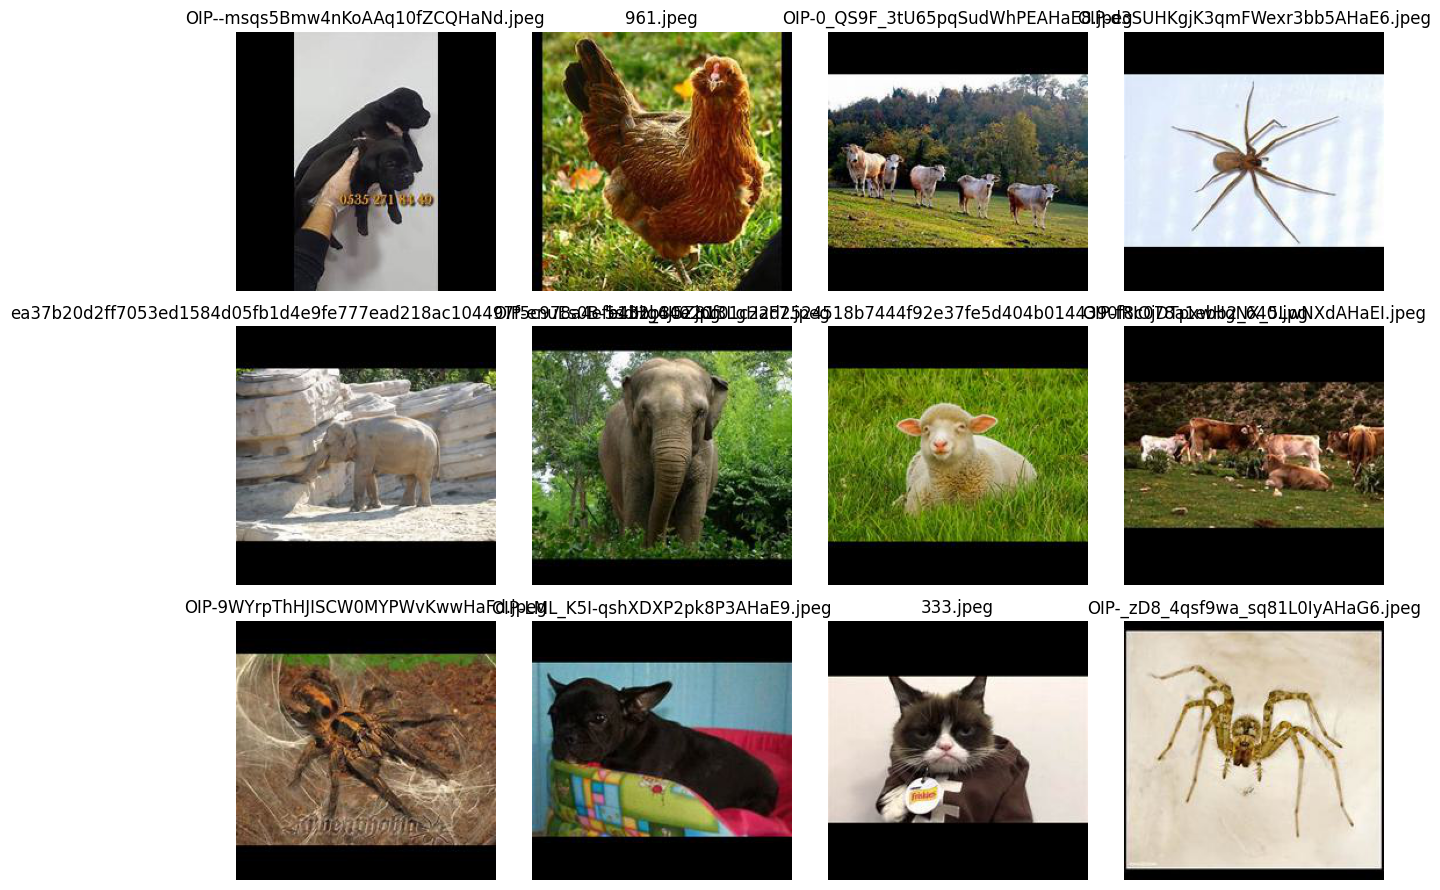

In [5]:
import os, random
from PIL import Image
import matplotlib.pyplot as plt

DATA_DIR = r"C:\Users\danis\EDGE INTELLIGENCE LAB\Animals_resized"
MAX_SAMPLES = 12  # how many random images you want

# collect all image paths
all_paths = []
for root, dirs, files in os.walk(DATA_DIR):
    for f in files:
        if f.lower().endswith(('.jpg','.jpeg','.png')):
            all_paths.append(os.path.join(root, f))

# pick randomly
sample_paths = random.sample(all_paths, MAX_SAMPLES)

ROWS = 3
COLS = 4
plt.figure(figsize=(COLS * 3, ROWS * 3))

for i, path in enumerate(sample_paths):
    img = Image.open(path)
    plt.subplot(ROWS, COLS, i+1)
    plt.imshow(img)
    plt.title(os.path.basename(path))
    plt.axis("off")

plt.tight_layout()
plt.show()
